![](pollute.webp)

# INDIA AIR QUALITY DATA ANALYSIS, VISUALISATION AND PREDICTION
<h6>Project by: Drishti</h6>


<h2>Aim</h2>
<p>To do data analysis on India Air Quality data and predict tha value of Air Quality Index based on given features of concentration of sulphur dioxide,nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter and classify the Air Quality as good, moderate, poor, unhealthy, healthy.</p>
<h4><p>Description of the Dataset is as follows:</h4>
<li>stn_code : Station code. A code is given to each station that recorded the data.</li>
<li>sampling_date: The date when the data was recorded.</li>
<li>state: It represents the states whose air quality data is measured.</li>
<li>location: It represents the city whose air quality data is measured.</li>
<li>agency: Name of the agency that measured the data.</li>
<li>type: The type of area where the measurement was made.</li>
<li>so2: The amount of Sulphur Dioxide measured.</li>
<li>no2: The amount of Nitrogen Dioxide measured.</li>
<li>spm: Suspended Particulate Matter measured.</li>
<li>location_monitoring_station: It indicates the location of the monitoring area.</li>
<li>date: It represents the date of recording.</li>
</p>




In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Pollution_new.csv') #import data 

In [4]:
data.head(10) #print first 10 rows

,stn_code,state,location,type,so2,no2,spm,Date,sampling_date,agency,location_monitoring_station
0,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,133.0,01-01-2015,February - M021990,NaN,NaN
1,151.0,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,82.0,02-01-2015,February - M021990,NaN,NaN
2,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,111.0,03-01-2015,February - M021990,NaN,NaN
3,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,118.0,04-01-2015,March - M031990,NaN,NaN
4,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,135.0,05-01-2015,March - M031990,NaN,NaN
5,151.0,Andhra Pradesh,Hyderabad,Industrial Area,7.9,10.2,80.0,06-01-2015,March - M031990,NaN,NaN
6,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.0,9.9,179.0,07-01-2015,April - M041990,NaN,NaN
7,151.0,Andhra Pradesh,Hyderabad,Industrial Area,12.4,11.5,58.0,08-01-2015,April - M041990,NaN,NaN
8,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.0,12.3,99.0,09-01-2015,April - M041990,NaN,NaN
9,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,11.5,270.0,10-01-2015,May - M051990,NaN,NaN


In [5]:
data.tail(10) #printing last 10 rows

,stn_code,state,location,type,so2,no2,spm,Date,sampling_date,agency,location_monitoring_station
435107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-10-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-10-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-11-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-11-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-11-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-11-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-12-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09-12-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"
435116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-12-2015,West Bengal State Pollution Control Board,"Inside Rampal Industries,ULUBERIA"


In [6]:
data.columns #print the columns/features of the data

Index(['stn_code', 'state', 'location', 'type', 'so2', 'no2', 'spm', 'Date',
       'sampling_date', 'agency', 'location_monitoring_station'],
      dtype='object')

In [7]:
data.describe() #basic info of the dataset

,stn_code,so2,no2,spm
count,23842.000000,29036.000000,29091.000000,8082.000000
mean,487.917834,6.871370,17.222196,160.375353
std,174.893989,5.100908,8.799885,108.923345
min,95.000000,0.400000,0.500000,5.000000
25%,388.000000,4.300000,12.000000,86.000000
50%,536.000000,5.500000,15.000000,135.000000
75%,585.000000,8.000000,20.000000,205.000000
max,788.000000,228.000000,334.900000,1300.000000


# DATA SHAPE (DIMENSION)

In [8]:
data.shape #dimensions of the data

(435117, 11)

# Visualization for states with highest pollutants


![](pollution.jpg)

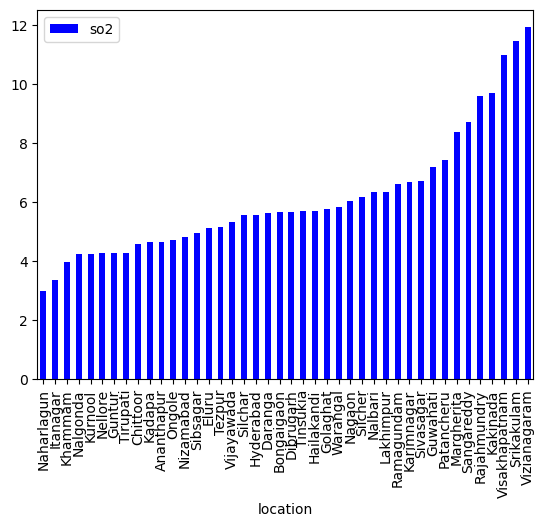

In [9]:
data[['so2','location']].groupby(["location"]).mean().sort_values(by='so2').plot.bar(color='b')
plt.show() 

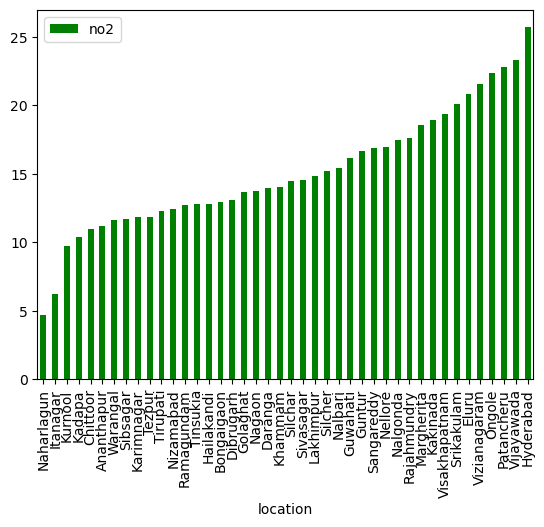

In [10]:
data[['no2','location']].groupby(["location"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

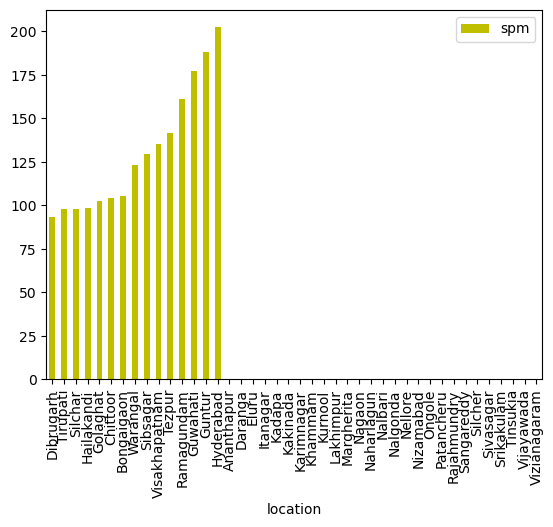

In [11]:
data[['spm','location']].groupby(["location"]).mean().sort_values(by='spm').plot.bar(color='y')
plt.show()

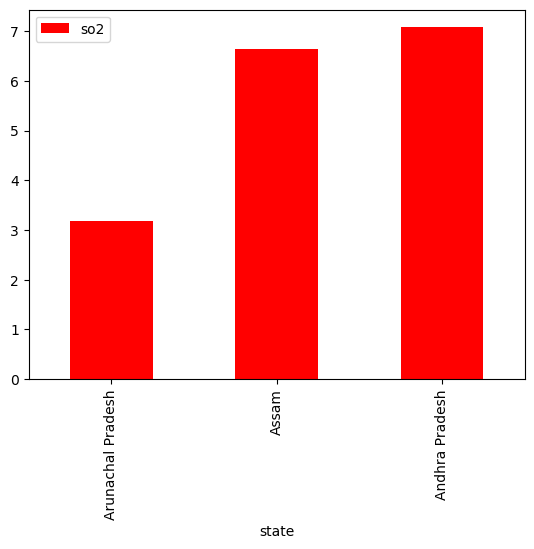

In [12]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='r')
plt.show()

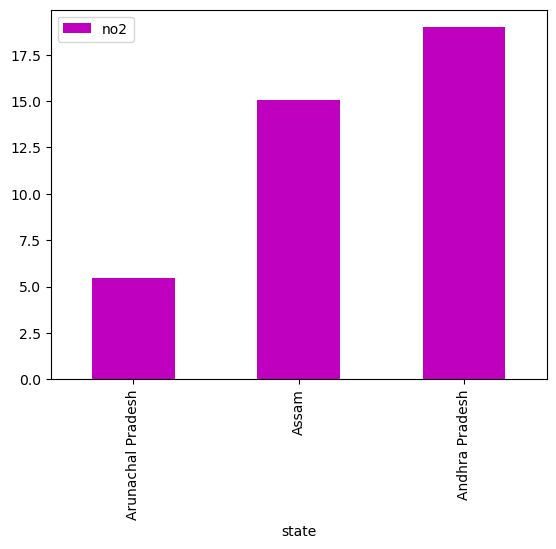

In [13]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='m')
plt.show()

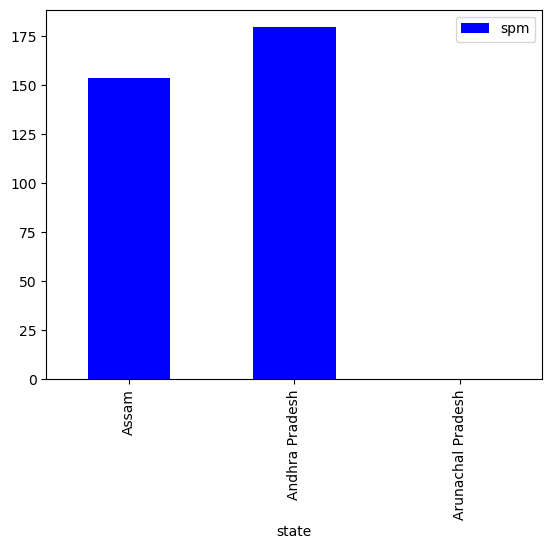

In [14]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

# NULL VALUES COUNT

In [15]:
data.isna().sum() #print the sum of null values for each columns

stn_code                       411275
state                          405586
location                       405586
type                           405831
so2                            406081
no2                            406026
spm                            427035
Date                           405586
sampling_date                       0
agency                         149478
location_monitoring_station     27488
dtype: int64

# DROP UNNECESSARY COLUMN

In [16]:
data.drop(['stn_code','sampling_date','agency','location_monitoring_station'],axis=1,inplace=True) 

In [17]:
data.head(10)

,state,location,type,so2,no2,spm,Date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,133.0,01-01-2015
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,82.0,02-01-2015
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,111.0,03-01-2015
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,118.0,04-01-2015
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,135.0,05-01-2015
5,Andhra Pradesh,Hyderabad,Industrial Area,7.9,10.2,80.0,06-01-2015
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.0,9.9,179.0,07-01-2015
7,Andhra Pradesh,Hyderabad,Industrial Area,12.4,11.5,58.0,08-01-2015
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.0,12.3,99.0,09-01-2015
9,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,11.5,270.0,10-01-2015


# CALCULATE TOTAL MISSING VALUES AND THEIR PERCENTAGE

In [18]:
total = data.isnull().sum().sort_values(ascending=False) 

In [19]:
total.head()

spm      427035
so2      406081
no2      406026
type     405831
state    405586
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [20]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [21]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [22]:
missing_data.head()

,Total,Percent
spm,427035,98.142569
so2,406081,93.326852
no2,406026,93.314212
type,405831,93.269397
state,405586,93.213090


# PERCENT OF MISSING VALUE (BAR PLOT)

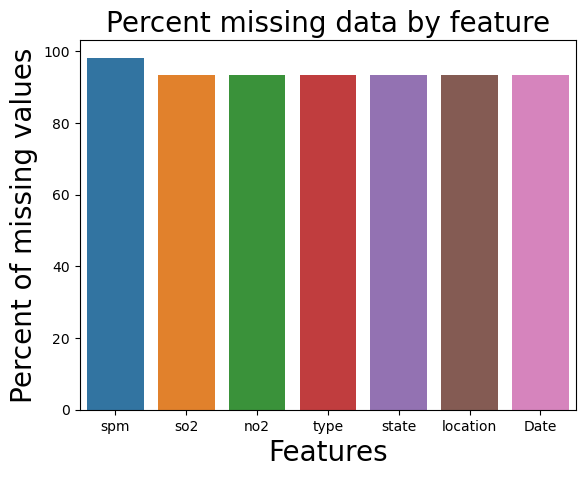

In [23]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)
plt.show()

# MEAN DISTRIBUTION BY STATE

In [24]:
data.groupby('state')[['spm','so2','no2']].mean()

,spm,so2,no2
state,,,
Andhra Pradesh,179.297485,7.076361,18.985863
Arunachal Pradesh,NaN,3.179104,5.469697
Assam,153.355386,6.629868,15.046593


Mean Distribution by Location

In [25]:
data.groupby('location')[['spm','so2','no2']].mean()

,spm,so2,no2
location,,,
Ananthapur,NaN,4.651235,11.188272
Bongaigaon,105.181138,5.665694,12.941811
Chittoor,104.472222,4.591226,11.013958
Daranga,NaN,5.640476,13.945238
Dibrugarh,93.472492,5.681282,13.066722
Eluru,NaN,5.127119,20.830508
Golaghat,102.303371,5.758925,13.648473
Guntur,187.971014,4.288605,16.693027
Guwahati,177.262421,7.205900,16.164075


# CHECKING DATA DISTRIBUTION

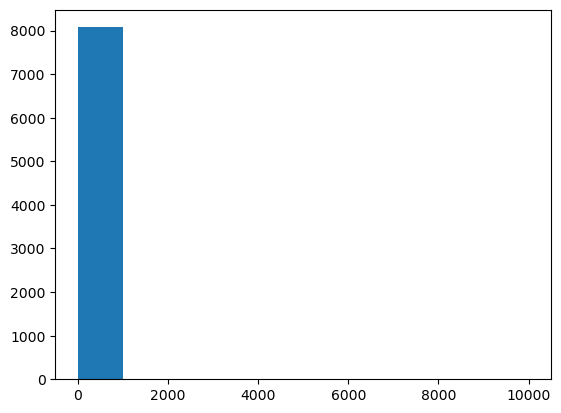

In [26]:
plt.hist(data.spm,range=(0.0,10000)) #spm
plt.show()

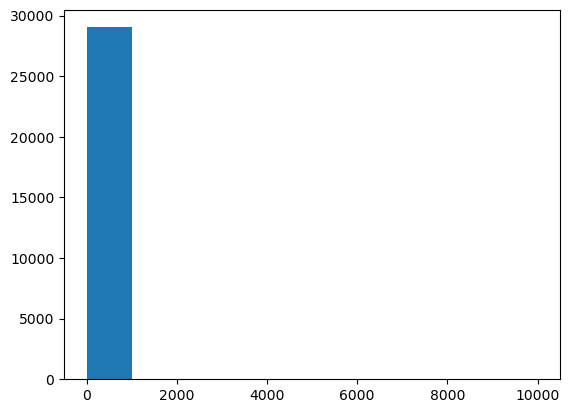

In [27]:
plt.hist(data.so2,range=(0,10000)) #so2
plt.show()

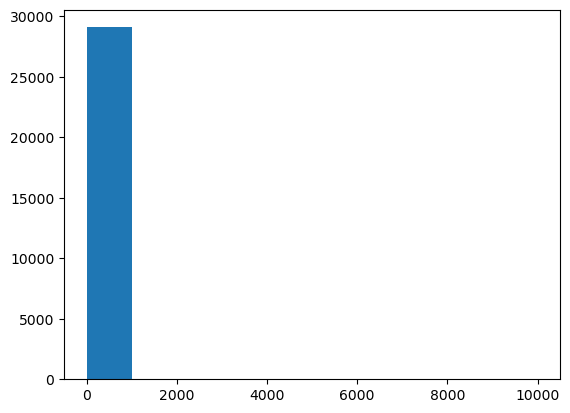

In [28]:
plt.hist(data.no2,range=(0,10000)) #no2
plt.show()

CONCLUSION: NO POTENTIAL OUTLIERS

# FILL MISSING VALUES BY MEAN (GROUP BY STATE)

In [29]:
grp_state = data.groupby('state')

In [30]:
def mean(series):
    return series.fillna(series.mean()) 

In [31]:
data['so2']=grp_state['so2'].transform(mean)      #fill value with mean value group by state
data['no2']=grp_state['no2'].transform(mean)
data['spm']=grp_state['spm'].transform(mean)

In [32]:
data.describe()

,so2,no2,spm
count,29531.000000,29531.000000,29441.000000
mean,6.869896,17.227885,167.957014
std,5.059097,8.743234,58.187330
min,0.400000,0.500000,5.000000
25%,4.300000,12.000000,153.355386
50%,5.800000,15.000000,179.297485
75%,8.000000,20.000000,179.297485
max,228.000000,334.900000,1300.000000


In [33]:
data.isna().sum() #some null value remains since some state have one value(i.e NaN only) and no mean to replace them

state       405586
location    405586
type        405831
so2         405586
no2         405586
spm         405676
Date        405586
dtype: int64

# Data Distribution after Replacing Null value with mean

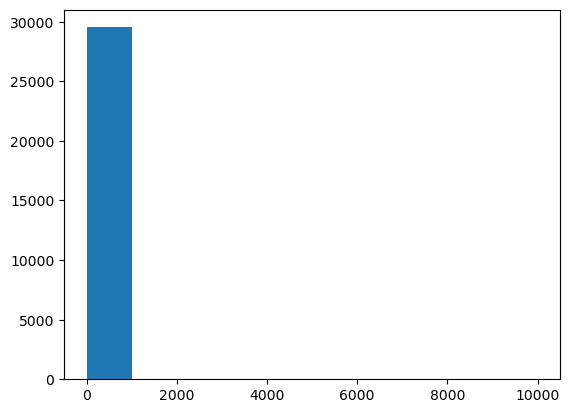

In [34]:
plt.hist(data.so2,range=(0,10000))
plt.show()

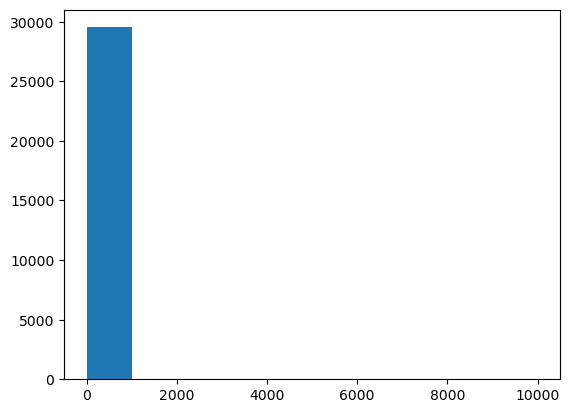

In [35]:
plt.hist(data.no2,range=(0.0,10000))
plt.show()

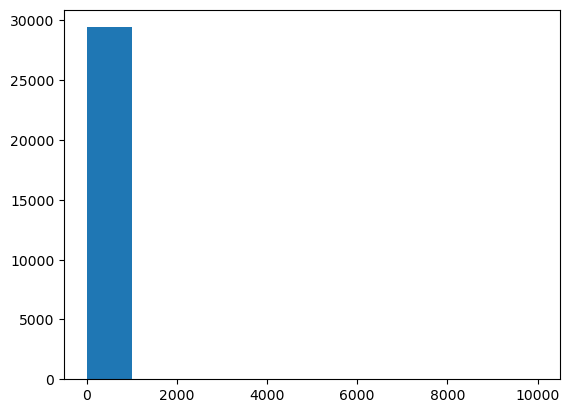

In [36]:
plt.hist(data.spm,range=(0.0,10000)) #spm
plt.show()

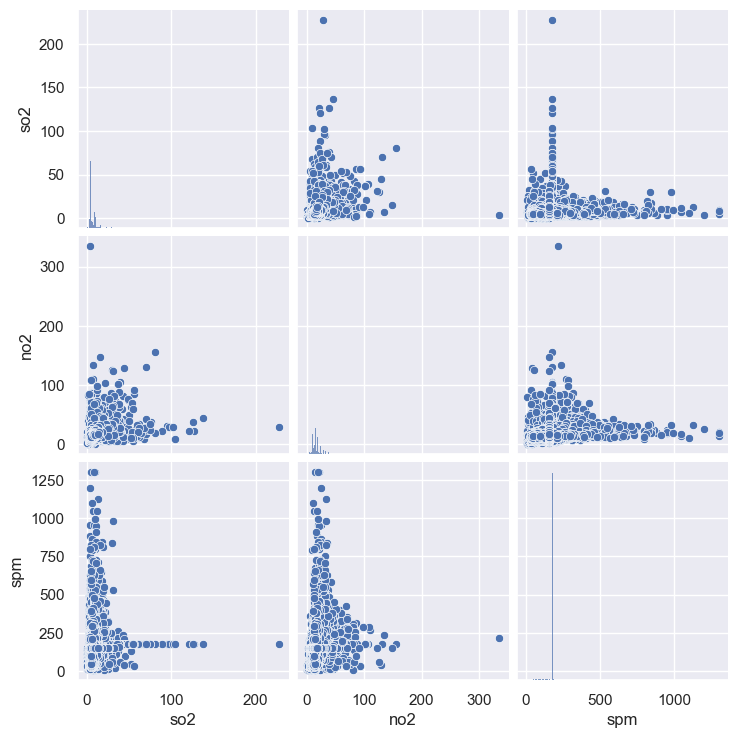

In [37]:
#Pair plots of all columns
sns.set()
cols = ['so2', 'no2', 'spm',]
sns.pairplot(data[cols], size = 2.5)
plt.show()

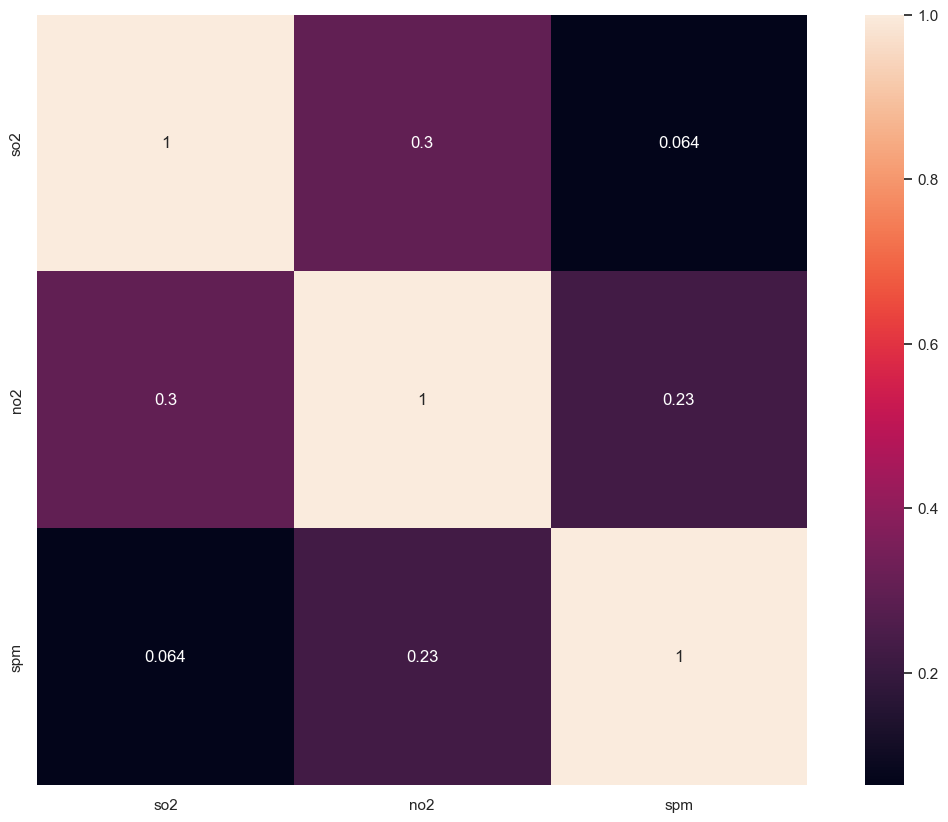

In [38]:
#Correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)
plt.show()

In [39]:
data.tail(10)

,state,location,type,so2,no2,spm,Date
435107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used
\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}



![](AQI.png)

Formula is based on the Indian CPCB(Central Pollution Control Board) & US-EPA(United States Environmental Protection Agency).

In [40]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,3.9,4.875
1,5.6,7.000
2,3.3,4.125
3,3.9,4.875
4,3.5,4.375


# CALCULATE  AIR QUALITY INDEX FOR NO2 BASED ON FORMULA

In [41]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,14.1,17.625
1,11.8,14.750
2,19.3,24.125
3,8.2,10.250
4,12.1,15.125


# CALCULATE  AIR QUALITY INDEX FOR SPM BASED ON FORMULA

In [42]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,133.0,122.000000
1,82.0,82.000000
2,111.0,107.333333
3,118.0,112.000000
4,135.0,123.333333


Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location

In [43]:
def cal_aqi(si,ni,spmi):
    aqi=0
    if(si>ni and si>spmi):
     aqi=si
    if(ni>si and ni>spmi ):
     aqi=ni
    if(spmi>si and spmi>ni):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','SPMi','AQI']]
df.head()


,state,SOi,Noi,SPMi,AQI
0,Andhra Pradesh,4.875,17.625,122.000000,122.000000
1,Andhra Pradesh,7.000,14.750,82.000000,82.000000
2,Andhra Pradesh,4.125,24.125,107.333333,107.333333
3,Andhra Pradesh,4.875,10.250,112.000000,112.000000
4,Andhra Pradesh,4.375,15.125,123.333333,123.333333


In [44]:
def cal_aqi(si,ni,spmi):
    aqi=0
    if(si>ni and si>spmi):
     aqi=si
    if(ni>si and ni>spmi ):
     aqi=ni
    if(spmi>si and spmi>ni):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['SPMi']),axis=1)
df= data[['location','SOi','Noi','SPMi','AQI']]
df.head()


,location,SOi,Noi,SPMi,AQI
0,Hyderabad,4.875,17.625,122.000000,122.000000
1,Hyderabad,7.000,14.750,82.000000,82.000000
2,Hyderabad,4.125,24.125,107.333333,107.333333
3,Hyderabad,4.875,10.250,112.000000,112.000000
4,Hyderabad,4.375,15.125,123.333333,123.333333


In [45]:
data.head()

,state,location,type,so2,no2,spm,Date,SOi,Noi,SPMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,133.0,01-01-2015,4.875,17.625,122.000000,122.000000
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,82.0,02-01-2015,7.000,14.750,82.000000,82.000000
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,111.0,03-01-2015,4.125,24.125,107.333333,107.333333
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,118.0,04-01-2015,4.875,10.250,112.000000,112.000000
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,135.0,05-01-2015,4.375,15.125,123.333333,123.333333


# AQI RANGE for corresponding AQI value 

In [46]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()


,state,location,type,so2,no2,spm,Date,SOi,Noi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,133.0,01-01-2015,4.875,17.625,122.000000,122.000000,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,82.0,02-01-2015,7.000,14.750,82.000000,82.000000,Moderate
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,111.0,03-01-2015,4.125,24.125,107.333333,107.333333,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,118.0,04-01-2015,4.875,10.250,112.000000,112.000000,Poor
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,135.0,05-01-2015,4.375,15.125,123.333333,123.333333,Poor


In [47]:
d=data #saving data in new value
d.head()

,state,location,type,so2,no2,spm,Date,SOi,Noi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,133.0,01-01-2015,4.875,17.625,122.000000,122.000000,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,82.0,02-01-2015,7.000,14.750,82.000000,82.000000,Moderate
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,111.0,03-01-2015,4.125,24.125,107.333333,107.333333,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,118.0,04-01-2015,4.875,10.250,112.000000,112.000000,Poor
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,135.0,05-01-2015,4.375,15.125,123.333333,123.333333,Poor


Remove the rows with null values

In [48]:
data=data.dropna(subset=['spm']) #spm

In [49]:
data.isna().sum() #all null values removed 

state          0
location       0
type         245
so2            0
no2            0
spm            0
Date           0
SOi            0
Noi            0
SPMi           0
AQI            0
AQI_Range      0
dtype: int64

![](LR.jpg)

# Linear Regression prediction

1. Using SOi, NOi, SPMi TO PREDICT AQI

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
X = data[['SOi','Noi','SPMi']]
y = data['AQI']
y.head()

0    122.000000
1     82.000000
2    107.333333
3    112.000000
4    123.333333
Name: AQI, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [53]:
X_train.head()

,SOi,Noi,SPMi
24069,8.750,17.500,135.570257
14693,7.500,66.250,152.864990
17664,5.625,11.875,57.000000
11082,10.000,13.750,152.864990
13443,12.500,16.250,152.864990


In [54]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

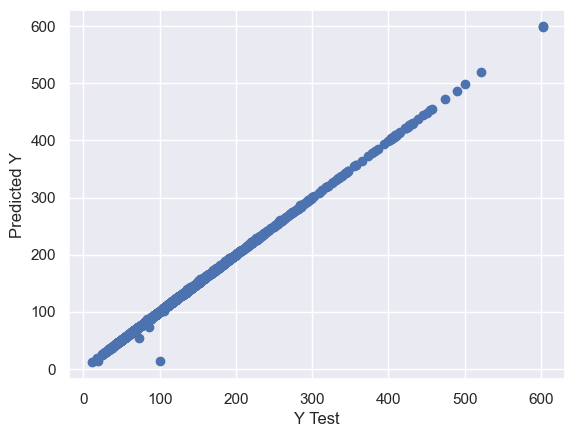

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [57]:
LR.score(X_test,y_test) 

0.9990987616071991

In [58]:
LR.predict([[4.8,21.75,100]]) 

array([100.32203584])

In [59]:
LR.predict([[5.2,7.625,75.0]])

array([74.7641358])

In [60]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:1.00 
MSE:1.27 


# Linear Regression Model 2
Using so2, no2, spm

In [61]:
X1= data[['so2','no2','spm']]
y1 = data['AQI']
y.tail()

29526    135.570257
29527    135.570257
29528    135.570257
29529    135.570257
29530    135.570257
Name: AQI, dtype: float64

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [63]:
X_train1.head()

,so2,no2,spm
24069,7.0,14.0,153.355386
14693,6.0,53.0,179.297485
17664,4.5,9.5,57.000000
11082,8.0,11.0,179.297485
13443,10.0,13.0,179.297485


In [64]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)

LinearRegression()

In [65]:
prediction1 = LR1.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

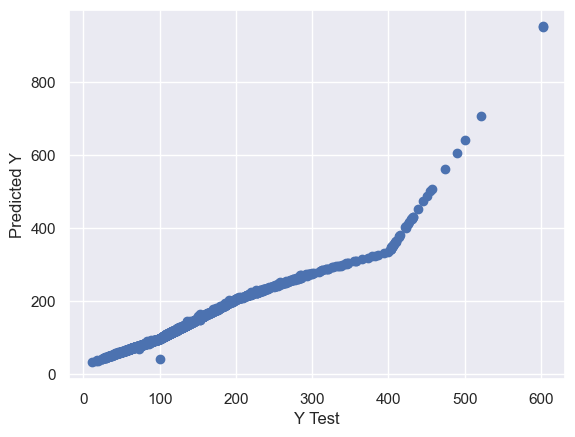

In [66]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
LR1.predict([[9.1,16.3,179]])

array([152.87724489])

In [68]:
y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [69]:
LR1.score(X_test1,y_test1) #accuracy score 76.82%

0.9522384320085557

Mean Squared error, R^2 sqaured

In [70]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.95 
MSE:9.24 


# Classification of AQI

![](Log.png)

## Logistic Regression

1.Using SOi, Noi, SPMi
    

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
X2 = data[['SOi','Noi','SPMi']]
y2 = data['AQI_Range']

In [73]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [74]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

LogisticRegression()

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
logmodel.score(X_test2,y_test2) #accuracy score 89.25 %

0.8638328530259366

Creating new csv file to store AQI range values inorder to cross verify predicted value

In [77]:
new = pd.DataFrame(d)
file1 = 'new1.csv'
new.to_csv(file1,index=True)

In [78]:
d.tail()

,state,location,type,so2,no2,spm,Date,SOi,Noi,SPMi,AQI,AQI_Range
435112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Good
435113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Good
435114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Good
435115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Good
435116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Good


In [79]:
logmodel.predict([[77.4,147.7,100]]) #correct

array(['Good'], dtype=object)

In [80]:
logmodel.predict([[32.7,35,203]]) #correct

array(['Poor'], dtype=object)

In [81]:
logmodel.predict([[100,182.2,400]]) #correct

array(['Poor'], dtype=object)

# Logistic regression model 2

2.Using so2,no2,spm

In [82]:
X3 = data[['so2','no2','spm']]
y3 = data['AQI_Range']

In [83]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [84]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train3,y_train3)

LogisticRegression()

In [85]:
logmodel2.score(X_test3,y_test3) #very low accuracy score

0.8644503911074516

In [86]:
logmodel2.predict([[4.8,17.4,200]]) #correct

array(['Poor'], dtype=object)

In [87]:
logmodel2.predict([[67.4,127.7,215]]) #correct

array(['Moderate'], dtype=object)

In [88]:
logmodel2.predict([[2.059,8.94,256]])  #wrong

array(['Hazardous'], dtype=object)

![](RF.webp)

#  Using Random forest classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train3,y_train3)

RandomForestClassifier(n_estimators=10)

In [91]:
model.score(X_test3,y_test3) #high accuracy score of 99.97 %

0.9989707698641416

In [92]:
X_train3.head()

,so2,no2,spm
9659,6.0,24.0,179.297485
8918,7.0,11.0,179.297485
5792,4.0,9.0,179.297485
26169,5.5,13.0,153.355386
2301,7.0,22.0,179.297485


In [93]:
model.predict([[2.059,8.94,256]]) #correct

array(['Poor'], dtype=object)

![](DT.jpg)

# Using Decision Tree Classifier

In [94]:
from sklearn import tree

In [95]:
model2 = tree.DecisionTreeClassifier()

In [96]:
model2.fit(X_train3,y_train3)

DecisionTreeClassifier()

In [97]:
model2.score(X_test3,y_test3) #high accuracy score of 99.98%

0.9998970769864142

Some predictions

In [98]:
model2.predict([[9,31,205.25]]) # correct

array(['Poor'], dtype=object)

In [99]:
model2.predict([[2,5.8,36]]) # correct

array(['Good'], dtype=object)

In [100]:
model2.predict([[18.6,48.3,285]]) # correct

array(['Unhealthy'], dtype=object)

In [101]:
model2.predict([[6,11,84.41]]) # correct

array(['Moderate'], dtype=object)

In [102]:
model2.predict([[10,16,372.66]]) # correct

array(['Very unhealthy'], dtype=object)

![](pandas.png)

# Generating Profile Report

In [103]:
#import the another library
from ydata_profiling import ProfileReport

In [104]:
prof = ProfileReport(data)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h1>Conclusion</h1>
<p>
<li>AQI is highly correlated with all the independent variables(so2, no2, spm)</li>
<li>AQI has been increasing over the years.</li>
<h4>Best models for AQI range classification :</h4>
<ol>
<li>Random Forest Classifier</li>
<li>Decision Tree Classifier</li>
</ol>
</p>



# THE END

![](thanku.jpg)